In [10]:
%pip install contextily

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point
import scipy.stats as stats

## Analysis of the California Fire Incidents Dataset

### 1. Data Overview
- **Total Records (Entries):** 1,636
- **Total Variables (Columns):** 40
- **Dataset Type:** CSV file

### 2. Data Provenance
- **Source:** The dataset appears to be compiled from official fire department records, including CAL FIRE and other agencies (kagle : https://www.kaggle.com/datasets/ananthu017/california-wildfire-incidents-20132020)
- **Collection Method:** Likely aggregated from fire incident reports submitted by various firefighting units and government agencies.

### 3. Census or Sample?
- This dataset is **not a sample**; it seems to be a **census of fire incidents** within California, capturing all reported fires over a specified period.

### 4. Data Processing
- Some fields, such as **AcresBurned**, **Fatalities**, and **PersonnelInvolved**, appear to be numeric.
- Others, like **ConditionStatement** and **Status**, contain text descriptions.
- **Dates** are in an ISO 8601 format (e.g., `2013-08-17T15:25:00Z`).
- Some values are missing, indicating incomplete reporting.

### 5. Selection/Sampling Criteria
- The dataset includes **all reported incidents** rather than a sampled subset.
- Fires that meet a particular threshold (size, impact, or agency reporting) may be included.

### 6. Units and Sample Size
- **Unit of Analysis:** Each row represents an individual fire incident.
- **Sample Size (Total Fires Recorded):** 1,636 incidents.

### 7. Key Variables (40 total)
- **Fire Characteristics:** `AcresBurned`, `PercentContained`, `FuelType`
- **Location:** `Latitude`, `Longitude`, `Counties`
- **Response Details:** `Engines`, `AirTankers`, `Helicopters`, `CrewsInvolved`
- **Impact:** `Fatalities`, `Injuries`, `StructuresDamaged`, `StructuresDestroyed`
- **Dates:** `Started`, `Extinguished`, `Updated`
- **Incident Management:** `AdminUnit`, `MajorIncident`, `CalFireIncident`



## Fire Characteristics

### AcresBurned
**Description:** Total area burned in acres.

**Type:** Numerical (Continuous)

**Range:** 0 - 257,314 acres

### PercentContained
**Description:** Percentage of fire containment.

**Type:** Numerical (Continuous)

**Range:** 0 - 100%

### FuelType
**Description:** Type of fuel that contributed to the fire.

**Type:** Categorical

**Levels:** Grass, Brush, Timber, Mixed

## Location

### Latitude
**Description:** Geographic coordinate (latitude) of fire incident.

**Type:** Numerical (Continuous)

**Range:** -90 to 90

### Longitude
**Description:** Geographic coordinate (longitude) of fire incident.

**Type:** Numerical (Continuous)

**Range:** -180 to 180

### Counties
**Description:** County where the fire occurred.

**Type:** Categorical

**Levels:** Various California counties

## Response Details

### Engines
**Description:** Number of fire engines deployed.

**Type:** Numerical (Discrete)

**Values:** 0, 1, 2, ...

### AirTankers
**Description:** Number of air tankers used.

**Type:** Numerical (Discrete)

**Values:** 0, 1, 2, ...

### Helicopters
**Description:** Number of helicopters involved.

**Type:** Numerical (Discrete)

**Values:** 0, 1, 2, ...

### CrewsInvolved
**Description:** Number of firefighting crews involved.

**Type:** Numerical (Discrete)

**Values:** 0, 1, 2, ...

## Impact

### Fatalities
**Description:** Number of reported fatalities due to the fire.

**Type:** Numerical (Discrete)

**Values:** 0, 1, 2, ...

### Injuries
**Description:** Number of people injured due to the fire.

**Type:** Numerical (Discrete)

**Values:** 0, 1, 2, ...

### StructuresDamaged
**Description:** Number of structures damaged.

**Type:** Numerical (Discrete)

**Values:** 0, 1, 2, ...

### StructuresDestroyed
**Description:** Number of structures completely destroyed.

**Type:** Numerical (Discrete)

**Values:** 0, 1, 2, ...

## Dates

### Started
**Description:** Date and time when the fire started.

**Type:** DateTime

**Format:** ISO 8601 (YYYY-MM-DDTHH:MM:SSZ)

### Extinguished
**Description:** Date and time when the fire was fully extinguished.

**Type:** DateTime

**Format:** ISO 8601 (YYYY-MM-DDTHH:MM:SSZ)

### Updated
**Description:** Last update timestamp of the fire record.

**Type:** DateTime

**Format:** ISO 8601 (YYYY-MM-DDTHH:MM:SSZ)

## Incident Management

### AdminUnit
**Description:** Fire management agency responsible for the fire.

**Type:** Categorical

**Levels:** Various fire management agencies

### MajorIncident
**Description:** Whether the fire was classified as a major incident.

**Type:** Boolean

**Levels:** True, False

### CalFireIncident
**Description:** Whether CAL FIRE was involved in managing the incident.

**Type:** Boolean

**Levels:** True, False



# Data description

In [12]:
df = pd.read_csv("California_Fire_Incidents.csv")

In [13]:
df.shape

(1636, 40)

In [14]:
df.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


In [15]:
df.columns

Index(['AcresBurned', 'Active', 'AdminUnit', 'AirTankers', 'ArchiveYear',
       'CalFireIncident', 'CanonicalUrl', 'ConditionStatement',
       'ControlStatement', 'Counties', 'CountyIds', 'CrewsInvolved', 'Dozers',
       'Engines', 'Extinguished', 'Fatalities', 'Featured', 'Final',
       'FuelType', 'Helicopters', 'Injuries', 'Latitude', 'Location',
       'Longitude', 'MajorIncident', 'Name', 'PercentContained',
       'PersonnelInvolved', 'Public', 'SearchDescription', 'SearchKeywords',
       'Started', 'Status', 'StructuresDamaged', 'StructuresDestroyed',
       'StructuresEvacuated', 'StructuresThreatened', 'UniqueId', 'Updated',
       'WaterTenders'],
      dtype='object')

In [16]:
df.dtypes

AcresBurned             float64
Active                     bool
AdminUnit                object
AirTankers              float64
ArchiveYear               int64
CalFireIncident            bool
CanonicalUrl             object
ConditionStatement       object
ControlStatement         object
Counties                 object
CountyIds                object
CrewsInvolved           float64
Dozers                  float64
Engines                 float64
Extinguished             object
Fatalities              float64
Featured                   bool
Final                      bool
FuelType                 object
Helicopters             float64
Injuries                float64
Latitude                float64
Location                 object
Longitude               float64
MajorIncident              bool
Name                     object
PercentContained        float64
PersonnelInvolved       float64
Public                     bool
SearchDescription        object
SearchKeywords           object
Started 

In [17]:
df.describe()

,AcresBurned,AirTankers,ArchiveYear,CrewsInvolved,Dozers,Engines,Fatalities,Helicopters,Injuries,Latitude,Longitude,PercentContained,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,WaterTenders
count,1633.000000,28.000000,1636.000000,171.000000,123.000000,191.000000,21.000000,84.000000,120.000000,1636.000000,1636.000000,1633.0,204.000000,67.000000,175.000000,0.0,30.000000,146.000000
mean,4589.443968,4.071429,2016.608802,11.561404,7.585366,23.565445,8.619048,5.357143,3.500000,37.203975,-108.082642,100.0,328.553922,67.970149,271.788571,NaN,522.800000,7.815068
std,27266.337722,6.399818,1.845340,14.455633,14.028616,41.004424,18.529642,7.265437,3.806231,135.401380,37.006927,0.0,521.138789,155.771975,1557.255963,NaN,739.586856,12.719251
min,0.000000,0.000000,2013.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-120.258000,-124.196290,100.0,0.000000,0.000000,0.000000,NaN,0.000000,1.000000
25%,35.000000,2.000000,2015.000000,2.500000,1.000000,5.000000,1.000000,1.000000,1.000000,34.165891,-121.768358,100.0,55.000000,1.000000,1.000000,NaN,0.000000,2.000000
50%,100.000000,2.000000,2017.000000,6.000000,2.000000,11.000000,3.000000,2.000000,3.000000,37.104065,-120.461560,100.0,151.500000,6.000000,7.000000,NaN,45.000000,4.000000
75%,422.000000,4.000000,2018.000000,13.500000,5.000000,24.000000,6.000000,5.000000,4.000000,39.086808,-117.474073,100.0,350.000000,49.500000,41.500000,NaN,1043.750000,6.000000
max,410203.000000,27.000000,2019.000000,82.000000,76.000000,256.000000,85.000000,29.000000,26.000000,5487.000000,118.908200,100.0,3100.000000,783.000000,18804.000000,NaN,2600.000000,79.000000


In [18]:
df.info

<bound method DataFrame.info of       AcresBurned  Active                                          AdminUnit  \
0        257314.0   False  Stanislaus National Forest/Yosemite National Park   
1         30274.0   False  USFS Angeles National Forest/Los Angeles Count...   
2         27531.0   False  CAL FIRE Riverside Unit / San Bernardino Natio...   
3         27440.0   False                              Tahoe National Forest   
4         24251.0   False                       Ventura County Fire/CAL FIRE   
...           ...     ...                                                ...   
1631          9.0   False                   CAL FIRE / Riverside County Fire   
1632          2.0   False                  CAL FIRE Nevada-Yuba-Placer Unit    
1633          NaN   False               Yolo County Fire Protection District   
1634          NaN   False                   Camp Pendleton Marine Corps Base   
1635          NaN   False                           Bureau of Indian Affairs   

      A

## Checking missing values

### Calculate percentage of missing values

In [19]:
perc = round(df.isnull().sum() / len(df), 2) * 100

### Filter and display columns with missing values


In [20]:
print("\nPercentage of missing values:")
missing_columns = perc[perc > 0]
print(missing_columns)


Percentage of missing values:
AirTankers               98.0
ConditionStatement       83.0
ControlStatement         94.0
CrewsInvolved            90.0
Dozers                   92.0
Engines                  88.0
Extinguished              4.0
Fatalities               99.0
FuelType                 99.0
Helicopters              95.0
Injuries                 93.0
PersonnelInvolved        88.0
SearchDescription         1.0
SearchKeywords           12.0
StructuresDamaged        96.0
StructuresDestroyed      89.0
StructuresEvacuated     100.0
StructuresThreatened     98.0
WaterTenders             91.0
dtype: float64


### Display columns with more than 50% missing values


In [21]:
deleting_columns = perc[perc > 50]
print(deleting_columns.index)

Index(['AirTankers', 'ConditionStatement', 'ControlStatement', 'CrewsInvolved',
       'Dozers', 'Engines', 'Fatalities', 'FuelType', 'Helicopters',
       'Injuries', 'PersonnelInvolved', 'StructuresDamaged',
       'StructuresDestroyed', 'StructuresEvacuated', 'StructuresThreatened',
       'WaterTenders'],
      dtype='object')


### Drop columns with more than 50% missing values

In [22]:
fire = df.drop(columns=deleting_columns.index)


### Check that everything we want is deleted

In [23]:
print("\nMissing values per column:")
perc = round(fire.isnull().sum() / len(df), 2) * 100
print(perc)


Missing values per column:
AcresBurned           0.0
Active                0.0
AdminUnit             0.0
ArchiveYear           0.0
CalFireIncident       0.0
CanonicalUrl          0.0
Counties              0.0
CountyIds             0.0
Extinguished          4.0
Featured              0.0
Final                 0.0
Latitude              0.0
Location              0.0
Longitude             0.0
MajorIncident         0.0
Name                  0.0
PercentContained      0.0
Public                0.0
SearchDescription     1.0
SearchKeywords       12.0
Started               0.0
Status                0.0
UniqueId              0.0
Updated               0.0
dtype: float64


### Impute moderate missing value columns


In [24]:
fire['SearchKeywords'] = fire['SearchKeywords'].fillna("Unknown")

### Impute low missing value columns

In [25]:
fire['Extinguished'] = fire['Extinguished'].fillna("Unknown")
fire['SearchDescription'] = fire['SearchDescription'].fillna("Unknown")

### Check that all data is clean

In [26]:
print("\nMissing values per column:")
perc = round(fire.isnull().sum() / len(df), 2) * 100
print(perc)


Missing values per column:
AcresBurned          0.0
Active               0.0
AdminUnit            0.0
ArchiveYear          0.0
CalFireIncident      0.0
CanonicalUrl         0.0
Counties             0.0
CountyIds            0.0
Extinguished         0.0
Featured             0.0
Final                0.0
Latitude             0.0
Location             0.0
Longitude            0.0
MajorIncident        0.0
Name                 0.0
PercentContained     0.0
Public               0.0
SearchDescription    0.0
SearchKeywords       0.0
Started              0.0
Status               0.0
UniqueId             0.0
Updated              0.0
dtype: float64


### Convert date columns to datetime

In [27]:
fire['Extinguished'] = pd.to_datetime(fire['Extinguished'], errors='coerce')
fire['Started'] = pd.to_datetime(fire['Started'], errors='coerce')
fire['Updated'] = pd.to_datetime(fire['Updated'], errors='coerce')

# Geospatial plot

### Convert latitude and longitude into Point geometries

### Assign colors based on the activity


### Identifying erroneous values

In [28]:
print(fire['Longitude'].describe())
print(fire['Latitude'].describe())

count    1636.000000
mean     -108.082642
std        37.006927
min      -124.196290
25%      -121.768358
50%      -120.461560
75%      -117.474073
max       118.908200
Name: Longitude, dtype: float64
count    1636.000000
mean       37.203975
std       135.401380
min      -120.258000
25%        34.165891
50%        37.104065
75%        39.086808
max      5487.000000
Name: Latitude, dtype: float64


### Delete or modify wrong values

In [29]:
fire = fire[(fire['Latitude'] > 29) & (fire['Latitude'] < 42 )]
fire = fire[ fire['Longitude'] < -115 ]

### Plot


In [30]:
fire['geometry'] = [Point(xy) for xy in zip(fire['Longitude'], fire['Latitude'])]
gdf = gpd.GeoDataFrame(fire, geometry='geometry', crs="EPSG:4326").to_crs(epsg=3857)


In [31]:
gdf['color'] = gdf['Active'].apply(lambda p: 'red' if True else 'grey')

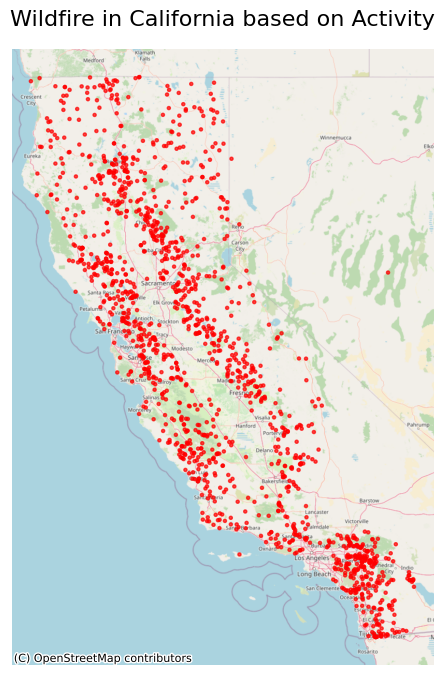

In [32]:
# Plot
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, marker='o', color=gdf['color'], markersize=5, alpha=0.7)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title("Wildfire in California based on Activity", fontsize=16)
ax.set_axis_off()
plt.show()


# Unvariate Analysis

In [33]:
fire.Active.describe()

count      1464
unique        1
top       False
freq       1464
Name: Active, dtype: object

# Detecting outliers in the Acres Burned column

In [34]:
Q1 = df['AcresBurned'].quantile(0.25)
Q3 = df['AcresBurned'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['AcresBurned'] < lower_bound) | (df['AcresBurned'] > upper_bound)]
print(f"Number of outliers in 'AcresBurned': {len(outliers)}")
print(outliers['AcresBurned'].describe())

df_cleaned = df[(df['AcresBurned'] >= lower_bound) & (df['AcresBurned'] <= upper_bound)]


Number of outliers in 'AcresBurned': 304
count       304.000000
mean      24054.072368
std       59473.772364
min        1011.000000
25%        1969.250000
50%        4487.000000
75%       17625.250000
max      410203.000000
Name: AcresBurned, dtype: float64


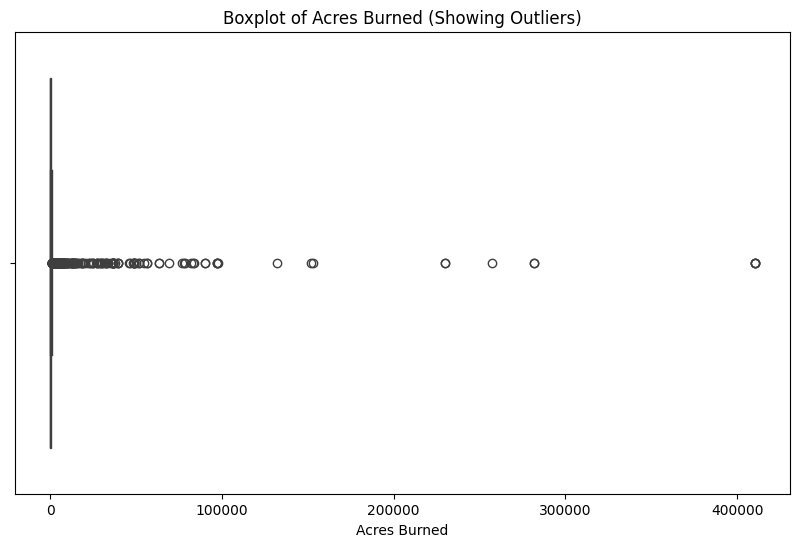

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['AcresBurned'])
plt.title('Boxplot of Acres Burned (Showing Outliers)')
plt.xlabel('Acres Burned')
plt.show()

## Price distribution before handling outliers

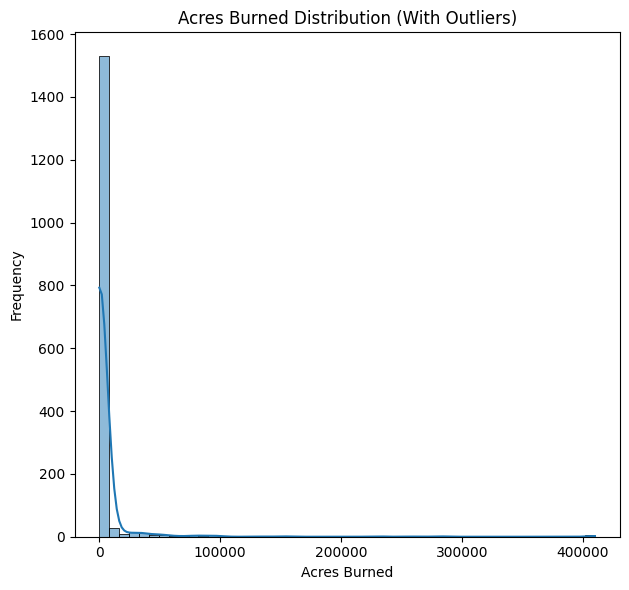

In [36]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['AcresBurned'], bins=50, kde=True)
plt.title('Acres Burned Distribution (With Outliers)')
plt.xlabel('Acres Burned')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Price distribution after handling outliers

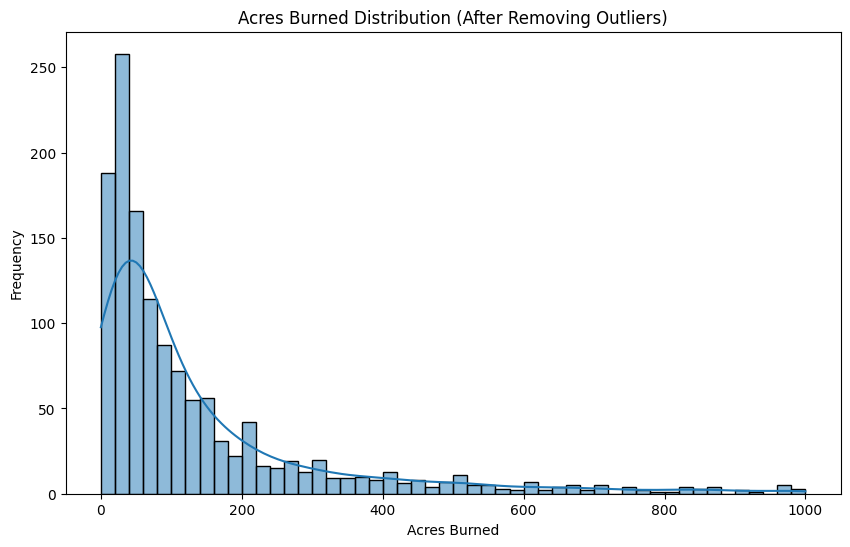

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['AcresBurned'], bins=50, kde=True)
plt.title('Acres Burned Distribution (After Removing Outliers)')
plt.xlabel('Acres Burned')
plt.ylabel('Frequency')
plt.show()


## Acres Burned by County (After Removing Outliers)

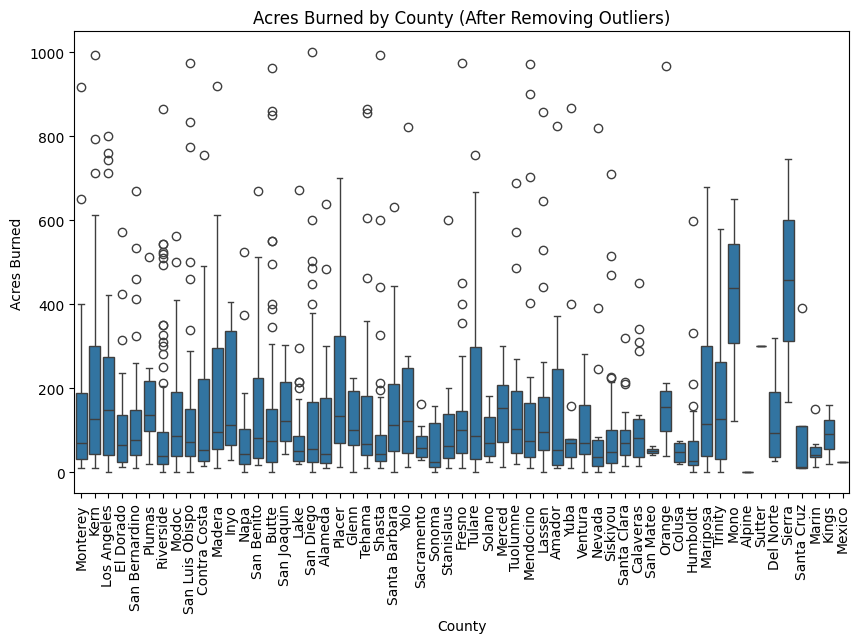

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Counties', y='AcresBurned', data=df_cleaned)
plt.title('Acres Burned by County (After Removing Outliers)')
plt.xlabel('County')
plt.ylabel('Acres Burned')
plt.xticks(rotation=90) 
plt.show()

# Multivariate Analysis

In [39]:
numerical_columns = ['AcresBurned', 'StructuresDamaged', 'StructuresDestroyed', 'PersonnelInvolved', 'Injuries']

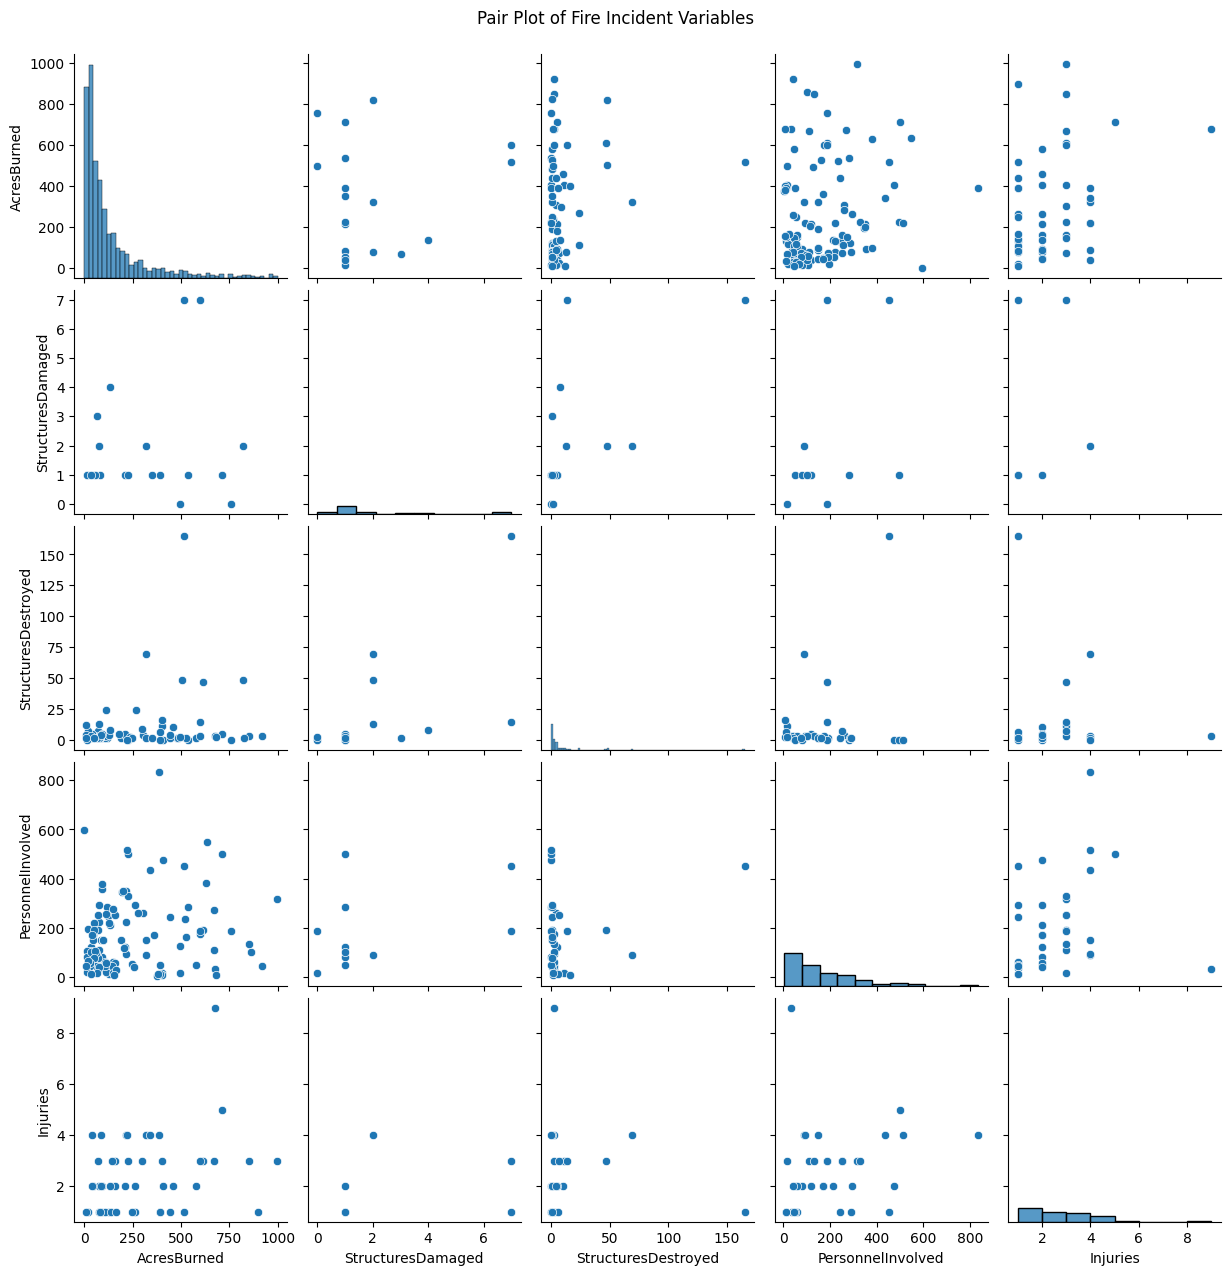

In [40]:
sns.pairplot(df_cleaned[numerical_columns])
plt.suptitle('Pair Plot of Fire Incident Variables', y=1.02)
plt.show()

# Calculate Correlation Matrix

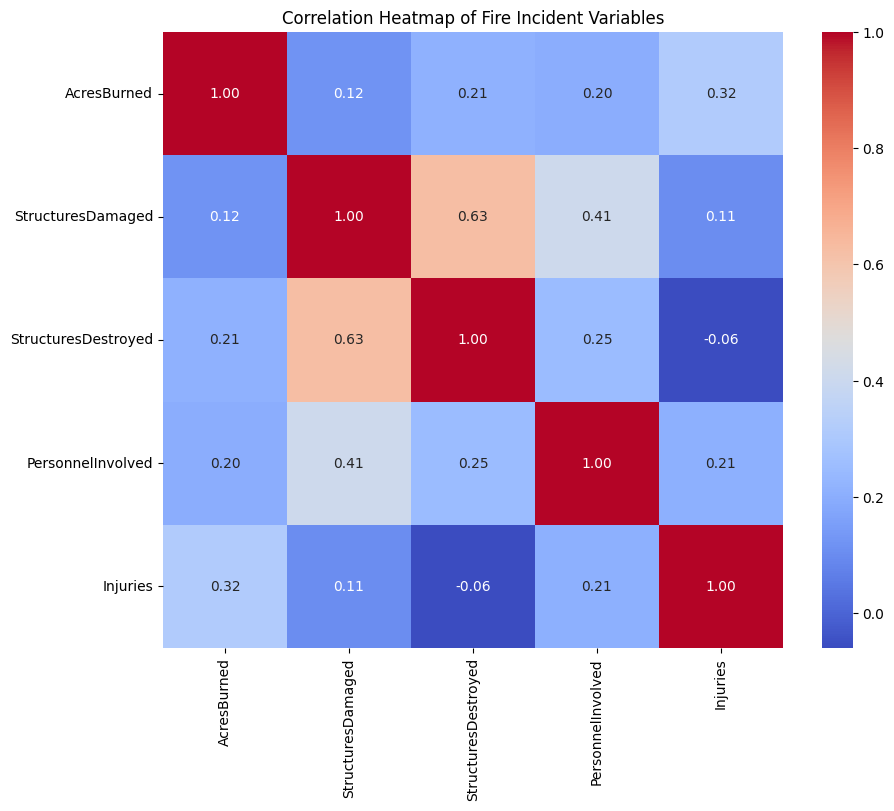

In [41]:
corr_matrix = df_cleaned[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Fire Incident Variables')
plt.show()


In [42]:
df_anova1 = df[['Status', 'AcresBurned']].dropna()

grouped_data = df_anova1.groupby('Status')['AcresBurned'].apply(list)

if len(grouped_data) > 1:
    anova1_result = stats.f_oneway(*grouped_data)
else:
    anova1_result = "Not enough groups for ANOVA"

anova1_result


F_onewayResult(statistic=np.float64(0.02608183311016423), pvalue=np.float64(0.8717206301185926))

The ANOVA test result shows:

F-statistic = 0.0261

p-value = 0.8717

Since the p-value is much greater than 0.05, we fail to reject the null hypothesis. This suggests that there is no statistically significant difference in the mean acres burned across different fire statuses.

In [43]:
df_anova2 = df.dropna(subset=["AcresBurned", "ArchiveYear"])
groups = [group["AcresBurned"].values for _, group in df_anova2.groupby("ArchiveYear")]
anova2_result = stats.f_oneway(*groups)
anova2_result

F_onewayResult(statistic=np.float64(3.60814373488309), pvalue=np.float64(0.0014711695439938376))

The ANOVA test results show an F-statistic of 3.61 and a p-value of 0.00147. Since the p-value is much lower than the typical significance level of 0.05, we can conclude that there are significant differences in the mean "AcresBurned" across different years.

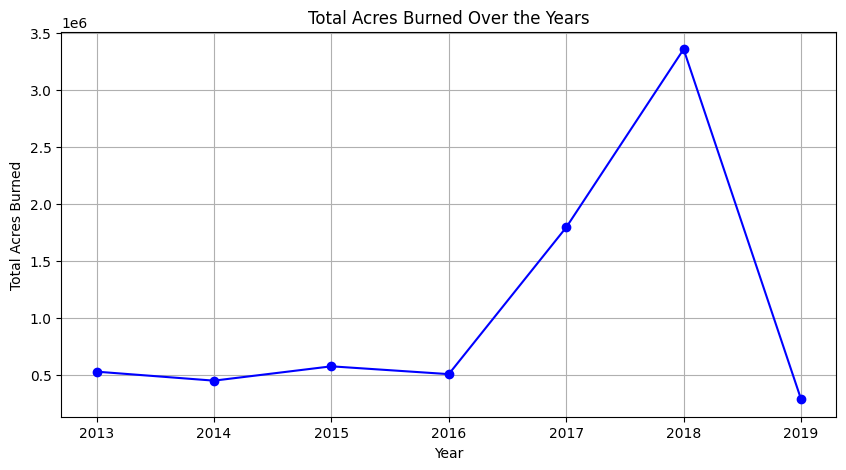

In [44]:
import matplotlib.pyplot as plt

df_yearly = df.groupby('ArchiveYear')['AcresBurned'].sum().reset_index()

# Plot the line graph
plt.figure(figsize=(10, 5))
plt.plot(df_yearly['ArchiveYear'], df_yearly['AcresBurned'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Total Acres Burned')
plt.title('Total Acres Burned Over the Years')
plt.grid(True)
plt.show()

This graph shows us how there has been a great increase of acres burned due to wildfires in 2017 and 2018 in California, highlighting the volatibility of wild fires. 

In [45]:


# Drop missing values
df_anova = df.dropna(subset=["AcresBurned", "PersonnelInvolved"])

# Define bins for personnel involved
bins = [0, 50, 200, df_anova["PersonnelInvolved"].max()]
labels = ["Low", "Medium", "High"]
df_anova["Personnel_Group"] = pd.cut(df_anova["PersonnelInvolved"], bins=bins, labels=labels)

# Perform ANOVA
groups = [group["AcresBurned"].values for _, group in df_anova.groupby("Personnel_Group")]
anova_result = stats.f_oneway(*groups)

# Print results
print(anova_result)

F_onewayResult(statistic=np.float64(5.205484194946431), pvalue=np.float64(0.006258039534338307))


C:\Users\Victor\AppData\Local\Temp\ipykernel_27220\1433613481.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anova["Personnel_Group"] = pd.cut(df_anova["PersonnelInvolved"], bins=bins, labels=labels)
C:\Users\Victor\AppData\Local\Temp\ipykernel_27220\1433613481.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group["AcresBurned"].values for _, group in df_anova.groupby("Personnel_Group")]


The number of personnel involved in fighting fires affects fire severity (in terms of acres burned). However, ANOVA only tells us that a difference exists—it does not tell us which groups (Low, Medium, or High personnel) differ significantly from each other. 
This is the logical interpretation of the above results. But in reality, we suppose that the severity of the fire is the cause of a high, medium or low number of personnel involved. So we can conclude that the fire affects the number of personne involved

In [46]:
df_corr = df.dropna(subset=["AcresBurned", "StructuresDestroyed"])

corr_coefficient, p_value = stats.pearsonr(df_corr["AcresBurned"], df_corr["StructuresDestroyed"])

corr_coefficient, p_value

(np.float64(0.21804290889683225), np.float64(0.0037468238181507896))

As the correlation coefficient is bigger than 0, there is a positive relationship. Moreover, the P-value is smaller than 0.05 so we can conclude that the number of acres burned is very correlated to the number of structures destroyed, which underlines acres burned does not only contain forests and fields.

In [47]:
df_corr = df.dropna(subset=["CrewsInvolved", "Fatalities"])

corr_coefficient, p_value = stats.pearsonr(df_corr["CrewsInvolved"], df_corr["Fatalities"])

print(f"Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.6924995122809787
P-value: 0.19497527093065653


Positively correlated (as corr>0) but not significant relationship (as p-value> 0.05)

In [48]:
df_corr = df.dropna(subset=["Dozers", "Fatalities"])

corr_coefficient, p_value = stats.pearsonr(df_corr["Dozers"], df_corr["Fatalities"])

print(f"Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: -0.571688600020724
P-value: 0.42831139997927603


Negatively correlated (as corr<0) but not significant relationship (as p-value> 0.05)

In [49]:
df_corr = df.dropna(subset=["Engines", "Fatalities"])

corr_coefficient, p_value = stats.pearsonr(df_corr["Engines"], df_corr["Fatalities"])

print(f"Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.9948295287929603
P-value: 0.0004459559173236091


Positively correlated (as corr>0) and significant relationship (as p-valu< 0.05)

These 3 test show the relationship between the number of fatalities and the number of different ressources. First we have the crews: the test shows a positive correlation bewteen the two, so crews are statisticaly not efficient, but with a non-significant relationship. Then we have the dozers, who have a negative correlation with the fatalities, showing us the more dozers there are the less fatalities, but at the same time, the relation is non-significant. Finally, we have the engines which seem to be deployed (as the crews) more with bigger fires.
